In [89]:
import pandas as pd
import seaborn as sns
import itertools
from wordcloud import WordCloud
from collections import Counter

In [116]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rc('font', family='NanumMyeongjo')

In [111]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumMyeongjo',
 'NanumGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'Nanum Pen Script',
 'Nanum Brush Script',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumMyeongjo Eco',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo Eco']

In [5]:
P_df = pd.read_excel('(정치)NewsResult_20180101-20221231.xlsx')
E_df = pd.read_excel('(경제)NewsResult_20180101-20221231.xlsx')
S_df = pd.read_excel('(사회)NewsResult_20180101-20221231.xlsx')
T_df = pd.read_excel('(기술)NewsResult_20180101-20221231.xlsx')

In [13]:
P_df['특성추출(가중치순 상위 50개)'][0].split(',')

['본회의',
 '화물차',
 '민주당',
 '일몰연장',
 '일몰법안',
 '운전자',
 '원내대표',
 '법안들',
 '화물연대',
 '건강보험국고지원',
 '추가연장근로제',
 '국회의원',
 '체포동의안',
 '더불어민주당',
 '몽니',
 '근로제',
 '박홍근',
 '안전운임제']

In [22]:
# 연도
str(P_df['일자'][0])[0:4]

# 연도 + 월
str(P_df['일자'][0])[0:6]

'202212'

In [25]:
P_df['date'] = [str(P_df['일자'][i])[0:6] for i in range(len(P_df))]
E_df['date'] = [str(E_df['일자'][i])[0:6] for i in range(len(E_df))]
S_df['date'] = [str(S_df['일자'][i])[0:6] for i in range(len(S_df))]
T_df['date'] = [str(T_df['일자'][i])[0:6] for i in range(len(T_df))]

In [45]:
P_agg = P_df.groupby('date').count().reset_index()
E_agg = E_df.groupby('date').count().reset_index()
S_agg = S_df.groupby('date').count().reset_index()
T_agg = T_df.groupby('date').count().reset_index()

In [46]:
P_agg = P_agg.iloc[:,0:2]
E_agg = E_agg.iloc[:,0:2]
S_agg = S_agg.iloc[:,0:2]
T_agg = T_agg.iloc[:,0:2]

In [49]:
P_agg.rename(columns = {'뉴스 식별자' : 'count'}, inplace = True)
E_agg.rename(columns = {'뉴스 식별자' : 'count'}, inplace = True)
S_agg.rename(columns = {'뉴스 식별자' : 'count'}, inplace = True)
T_agg.rename(columns = {'뉴스 식별자' : 'count'}, inplace = True)

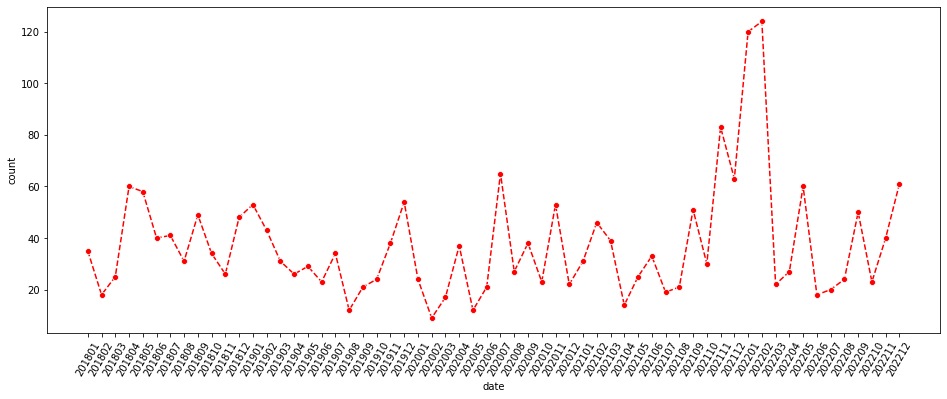

In [67]:
# 선 그래프 한개 그리기
plt.figure(figsize=(16,6))
sns.lineplot(x=P_agg['date'], y=P_agg['count'], 
             color='r', # 색상
             linestyle='--', # 라인 스타일
             marker='o') # 마커

plt.xticks(rotation=60)
plt.show()

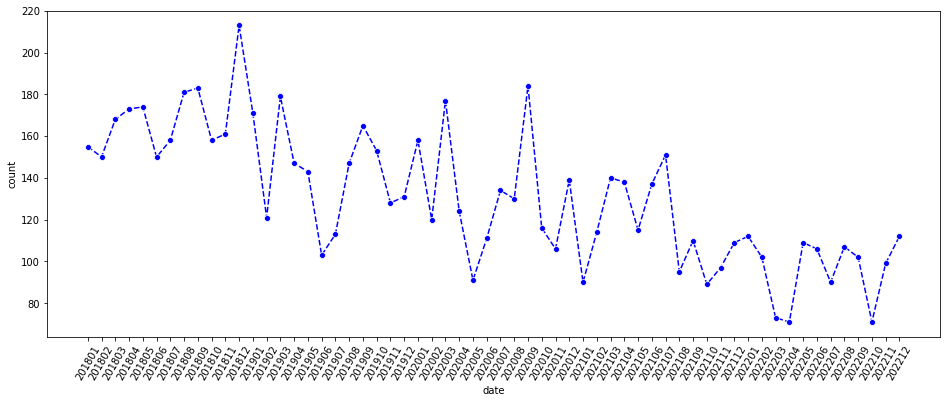

In [68]:
# 선 그래프 한개 그리기
plt.figure(figsize=(16,6))
sns.lineplot(x=E_agg['date'], y=E_agg['count'], 
             color='b', # 색상
             linestyle='--', # 라인 스타일
             marker='o') # 마커

plt.xticks(rotation=60)
plt.show()

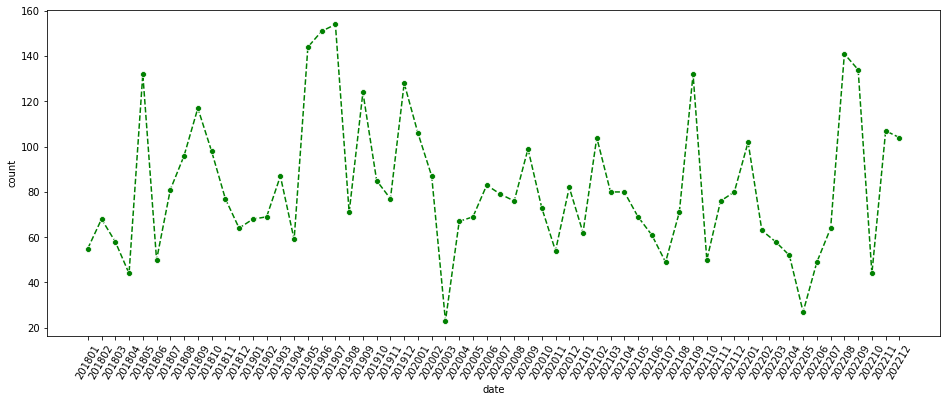

In [69]:
# 선 그래프 한개 그리기
plt.figure(figsize=(16,6))
sns.lineplot(x=S_agg['date'], y=S_agg['count'], 
             color='green', # 색상
             linestyle='--', # 라인 스타일
             marker='o') # 마커

plt.xticks(rotation=60)
plt.show()

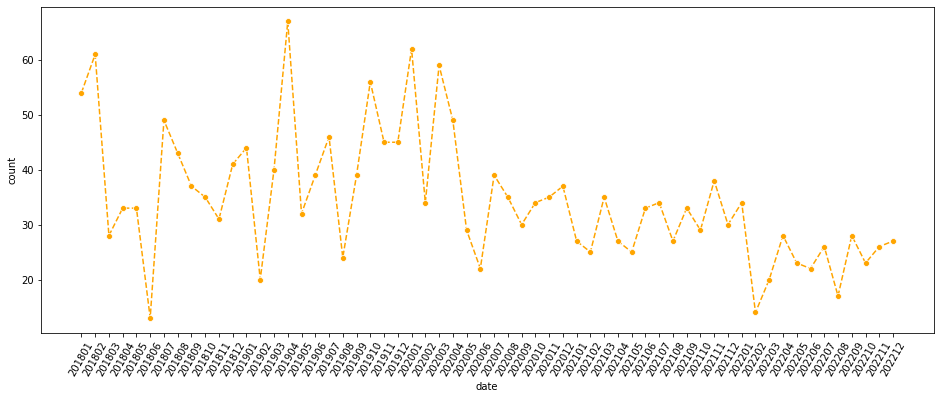

In [72]:
# 선 그래프 한개 그리기
plt.figure(figsize=(16,6))
sns.lineplot(x=T_agg['date'], y=T_agg['count'], 
             color='orange', # 색상
             linestyle='--', # 라인 스타일
             marker='o') # 마커

plt.xticks(rotation=60)
plt.show()

In [74]:
len(P_df), len(E_df), len(S_df), len(T_df)

(2245, 7854, 4914, 2071)

In [82]:
P_word = []
E_word = []
S_word = []
T_word = []

In [83]:
for i in range(len(P_df)):
    P_word.append(P_df['키워드'][i].split(','))

for i in range(len(E_df)):
    E_word.append(E_df['키워드'][i].split(','))

for i in range(len(S_df)):
    S_word.append(S_df['키워드'][i].split(','))
    
for i in range(len(T_df)):
    T_word.append(T_df['키워드'][i].split(','))

In [88]:
P_word = list(itertools.chain(*P_word))
E_word = list(itertools.chain(*E_word))
S_word = list(itertools.chain(*S_word))
T_word = list(itertools.chain(*T_word))

In [90]:
P_counts = Counter(P_word)
E_counts = Counter(E_word)
S_counts = Counter(S_word)
T_counts = Counter(T_word)
#tags = counts.most_common(40) 

In [129]:
P_counts.most_common(100)

[('후보', 6095),
 ('대통령', 5634),
 ('정부', 4749),
 ('의원', 3487),
 ('국민', 3287),
 ('북한', 3081),
 ('사업', 2879),
 ('지역', 2577),
 ('고속도로', 2519),
 ('경제', 2376),
 ('국회', 2211),
 ('서울', 2136),
 ('정책', 2102),
 ('예산', 2059),
 ('민주당', 1937),
 ('남북', 1926),
 ('대표', 1900),
 ('추진', 1898),
 ('공약', 1830),
 ('이날', 1774),
 ('건설', 1762),
 ('미국', 1753),
 ('시장', 1695),
 ('지원', 1597),
 ('대선', 1584),
 ('선거', 1564),
 ('국가', 1474),
 ('이재명', 1443),
 ('도로', 1396),
 ('철도', 1357),
 ('중국', 1348),
 ('산업', 1325),
 ('장관', 1319),
 ('위원장', 1276),
 ('정치', 1270),
 ('한국', 1250),
 ('강조', 1235),
 ('계획', 1220),
 ('고속도', 1208),
 ('문재인', 1200),
 ('더불어민주당', 1193),
 ('생각', 1117),
 ('상황', 1085),
 ('조사', 1036),
 ('청와대', 1022),
 ('사람', 992),
 ('평양', 964),
 ('발전', 963),
 ('연결', 956),
 ('일자리', 954),
 ('주장', 947),
 ('구간', 940),
 ('확대', 929),
 ('에너지', 900),
 ('사회', 892),
 ('가능', 880),
 ('협력', 880),
 ('트럼프', 874),
 ('투자', 860),
 ('부동산', 856),
 ('시작', 830),
 ('진행', 828),
 ('경기', 810),
 ('비판', 809),
 ('위원회', 806),
 ('위기', 794),
 ('대한민국', 792

In [156]:
palettes = ['Pastel1', 'Pastel2', 'Pastel1_r','Pastel2_r']

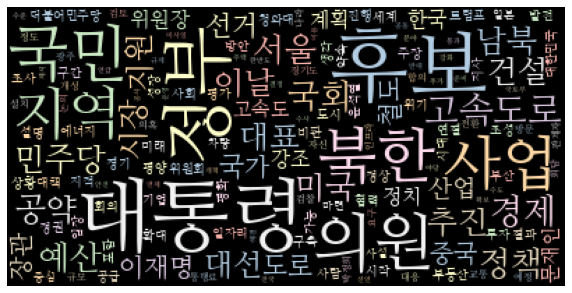

In [150]:
wc = WordCloud(font_path = 'NanumMyeongjo',background_color="black", max_font_size=60, colormap = palettes[0])
cloud = wc.generate_from_frequencies(dict(P_counts.most_common(150) ))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

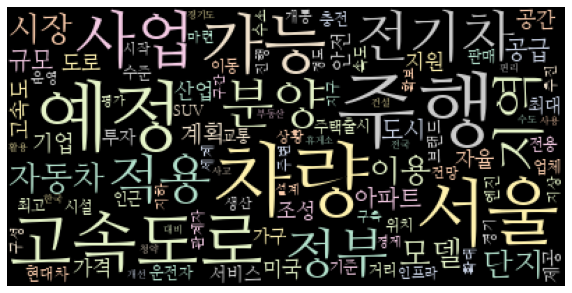

In [152]:
wc = WordCloud(font_path = 'NanumMyeongjo',background_color="black", max_font_size=60, colormap = palettes[1])
cloud = wc.generate_from_frequencies(dict(E_counts.most_common(100) ))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

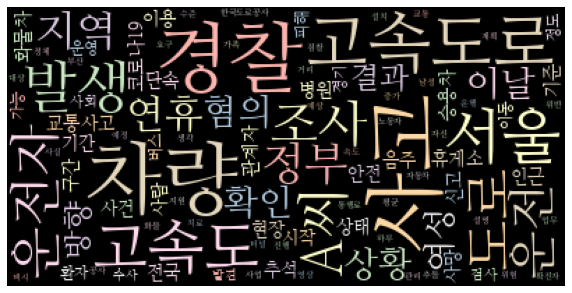

In [157]:
wc = WordCloud(font_path = 'NanumMyeongjo',background_color="black", max_font_size=60, colormap = palettes[2])
cloud = wc.generate_from_frequencies(dict(S_counts.most_common(100) ))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

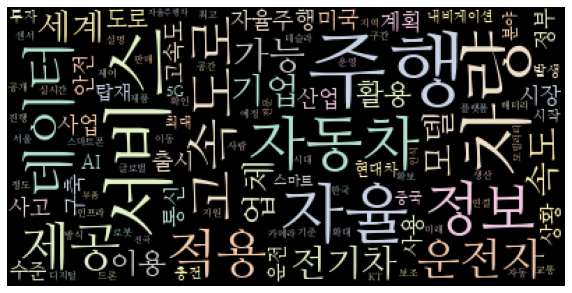

In [158]:
wc = WordCloud(font_path = 'NanumMyeongjo',background_color="black", max_font_size=60, colormap = palettes[3])
cloud = wc.generate_from_frequencies(dict(T_counts.most_common(100) ))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()